In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import random
import matplotlib.pyplot as plt

In [ ]:

ds_train =tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data/traindata")
ds_test =tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/traindata")

Found 2249 files belonging to 8 classes.
Found 2249 files belonging to 8 classes.
Found 591 files belonging to 8 classes.


In [ ]:
IMAGE_SIZE=[224,224]

train_path="/content/drive/MyDrive/data/traindata"
valid_path="/content/drive/MyDrive/dataset/traindata"

In [ ]:
inceptionresnet = InceptionResNetV2(input_shape=IMAGE_SIZE + [3],weights = 'imagenet', include_top=False)


219055592/219055592 [==============================] - 2s 0us/step


In [ ]:
inceptionresnet.trainable=False

model = tf.keras.Sequential([
        inceptionresnet,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(8, activation='softmax')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 batch_normalization_203 (B  (None, 5, 5, 1536)        10752     
 atchNormalization)                                              
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/data/traindata",
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 2249 images belonging to 8 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/dataset/traindata",
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 591 images belonging to 8 classes.


In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(training_set,epochs = 10,batch_size=16,validation_data=test_set)

Epoch 1/10
141/141 [==============================] - 844s 6s/step - loss: 1.2496 - accuracy: 0.5554 - val_loss: 0.5038 - val_accuracy: 0.8799
Epoch 2/10
141/141 [==============================] - 801s 6s/step - loss: 0.3848 - accuracy: 0.8724 - val_loss: 0.5939 - val_accuracy: 0.9052
Epoch 3/10
141/141 [==============================] - 794s 6s/step - loss: 0.2058 - accuracy: 0.9364 - val_loss: 0.5547 - val_accuracy: 0.9137
Epoch 4/10
141/141 [==============================] - 791s 6s/step - loss: 0.1944 - accuracy: 0.9422 - val_loss: 0.6053 - val_accuracy: 0.9289
Epoch 5/10
141/141 [==============================] - 788s 6s/step - loss: 0.0968 - accuracy: 0.9707 - val_loss: 0.7720 - val_accuracy: 0.9323
Epoch 6/10
141/141 [==============================] - 792s 6s/step - loss: 0.1444 - accuracy: 0.9635 - val_loss: 0.7975 - val_accuracy: 0.9306
Epoch 7/10
141/141 [==============================] - 832s 6s/step - loss: 0.1011 - accuracy: 0.9773 - val_loss: 0.8356 - val_accuracy: 0.9425

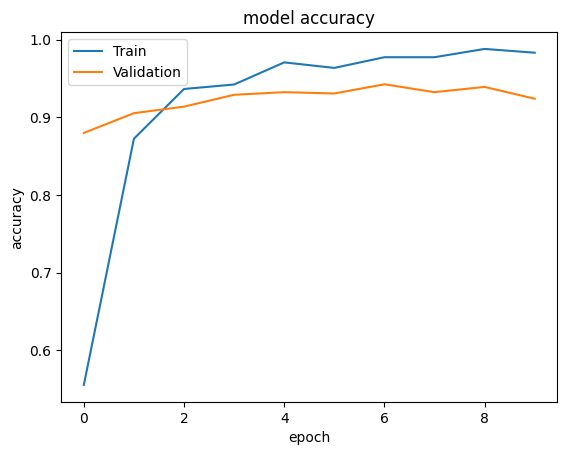

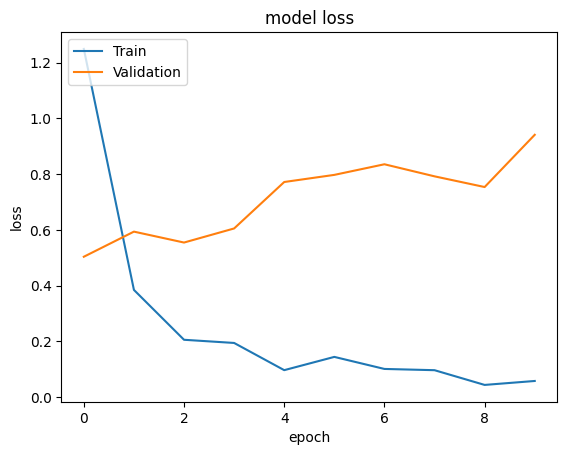

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

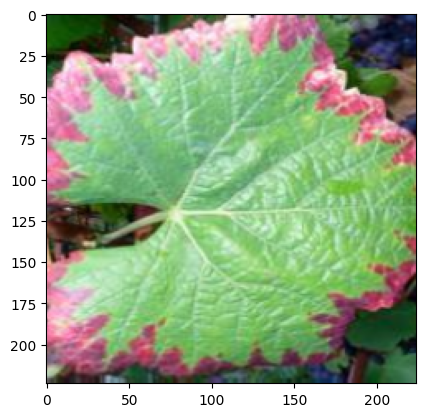

1/1 [==============================] - 14s 14s/step
predicted class index: phosphorous deficiency


In [ ]:
idx2 = random.randint(0,len(training_set)-1)

image_array,label = training_set[idx2]

plt.imshow(image_array[0])
plt.show()

predictions = model.predict(image_array)

predicted_class_index = np.argmax(predictions[0])

class_name=["copper deficiency","healthy leaf","iron deficiency","magnesium deficiency","molybdenum deficiency","nitrogen deficiency","phosphorous deficiency","pottassium deficiency"]

print("predicted class index:" ,class_name[predicted_class_index])

In [ ]:
tf.keras.models.save_model(model,'inceptionresnet.h5')

<ipython-input-16-f1e067c47bc5>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'inceptionresnet.h5')
